## CAPM模型

## classwork1-书上例题301

history(adjust=ADJUST_PREV, df= True,fill_missing="Last")

pd.merge

dropna


* 获取数据SHSE.000902与SHSE.600596的数据在2014-01-01到2014-12-31之间的数据

In [1]:
from gm.api import *
set_token("eea4b28a3ceb7048603d388bb777ebc67de47385")

In [2]:
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import numpy as np  
import pandas as pd

In [4]:
#Rf
Rf=(0.036+1)**(1/360)-1

In [5]:
data_902= history(symbol='SHSE.000902', frequency='1d', start_time='2014-01-01',  end_time='2014-12-31', fields='close,eob', fill_missing="Last", adjust=ADJUST_PREV, df= True)

In [7]:
data_596= history(symbol='SHSE.600596', frequency='1d', start_time='2014-01-01',  end_time='2014-12-31', fields='close,eob', fill_missing="Last", adjust=ADJUST_PREV, df= True)

In [10]:
#data_902.close.shift(1)
data0=pd.merge(right=data_902,left=data_596,on="eob")
Rm=(data0.close_y/data0.close_y.shift(1)-1).dropna()
Rq=(data0.close_x/data0.close_x.shift(1)-1).dropna()
model = sm.OLS((Rq-Rf), sm.add_constant(Rm-Rf))
result = model.fit()
result.params

In [17]:
data0=pd.merge(right=data_902,left=data_596,on="eob")
data0

,close_x,eob,close_y
0,6.6178,2014-01-02 00:00:00+08:00,3028.7490
1,6.5514,2014-01-03 00:00:00+08:00,3001.4619
2,6.0986,2014-01-06 00:00:00+08:00,2927.4771
3,6.1046,2014-01-07 00:00:00+08:00,2938.6021
4,6.0744,2014-01-08 00:00:00+08:00,2950.7329
...,...,...,...
239,6.6437,2014-12-25 00:00:00+08:00,4308.4941
240,6.6684,2014-12-26 00:00:00+08:00,4396.2959
241,6.4829,2014-12-29 00:00:00+08:00,4370.1890
242,6.3839,2014-12-30 00:00:00+08:00,4334.9771


In [32]:
#Rq Rm
Rm=(data0.close_y/data0.close_y.shift(1)-1).dropna()
Rq=(data0.close_x/data0.close_x.shift(1)-1).dropna()

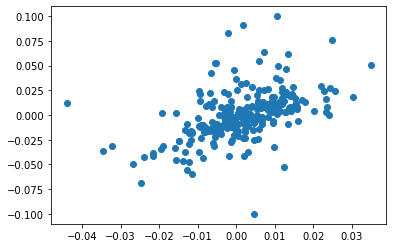

In [33]:
plt.plot(Rm-Rf,Rq-Rf,"o")

In [34]:
model = sm.OLS((Rq-Rf), sm.add_constant(Rm-Rf))
result = model.fit()

C:\Users\wp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                close_x   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     77.02
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           3.16e-16
Time:                        11:16:11   Log-Likelihood:                 580.35
No. Observations:                 243   AIC:                            -1157.
Df Residuals:                     241   BIC:                            -1150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.001     -1.102      0.272      -0.004       0.001
close_y        1.1238      0.128      8.776      0.000       0.872       1.376
==============================================================================
Omnibus:                       49.522   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.212
Skew:                           0.695   Prob(JB):                     3.77e-51
Kurtosis:                       7.583   Cond. No.                         89.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
result.params

const     -0.0016
close_y    1.1238
dtype: float64

In [37]:
x=np.arange(-0.05,0.05,0.005)
x

array([-5.00000000e-02, -4.50000000e-02, -4.00000000e-02, -3.50000000e-02,
       -3.00000000e-02, -2.50000000e-02, -2.00000000e-02, -1.50000000e-02,
       -1.00000000e-02, -5.00000000e-03, -2.77555756e-17,  5.00000000e-03,
        1.00000000e-02,  1.50000000e-02,  2.00000000e-02,  2.50000000e-02,
        3.00000000e-02,  3.50000000e-02,  4.00000000e-02,  4.50000000e-02])

In [38]:
y=-0.0016+1.1238*x
y

array([-0.05779 , -0.052171, -0.046552, -0.040933, -0.035314, -0.029695,
       -0.024076, -0.018457, -0.012838, -0.007219, -0.0016  ,  0.004019,
        0.009638,  0.015257,  0.020876,  0.026495,  0.032114,  0.037733,
        0.043352,  0.048971])

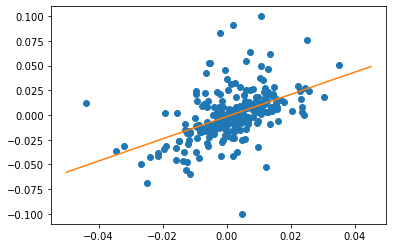

In [39]:
plt.plot(Rm-Rf,Rq-Rf,"o")
plt.plot(x,y,"-")

In [22]:
Rq-Rf

1     -0.0091
2     -0.0247
3      0.0037
4      0.0040
5     -0.0116
        ...  
239    0.0242
240    0.0203
241   -0.0060
242   -0.0082
243    0.0157
Name: close_y, Length: 243, dtype: float64

In [6]:
data_902

,close,eob
0,3028.7490,2014-01-02 00:00:00+08:00
1,3001.4619,2014-01-03 00:00:00+08:00
2,2927.4771,2014-01-06 00:00:00+08:00
3,2938.6021,2014-01-07 00:00:00+08:00
4,2950.7329,2014-01-08 00:00:00+08:00
...,...,...
240,4308.4941,2014-12-25 00:00:00+08:00
241,4396.2959,2014-12-26 00:00:00+08:00
242,4370.1890,2014-12-29 00:00:00+08:00
243,4334.9771,2014-12-30 00:00:00+08:00


In [4]:
data_902

,close,eob
0,3028.7490,2014-01-02 00:00:00+08:00
1,3001.4619,2014-01-03 00:00:00+08:00
2,2927.4771,2014-01-06 00:00:00+08:00
3,2938.6021,2014-01-07 00:00:00+08:00
4,2950.7329,2014-01-08 00:00:00+08:00
...,...,...
240,4308.4941,2014-12-25 00:00:00+08:00
241,4396.2959,2014-12-26 00:00:00+08:00
242,4370.1890,2014-12-29 00:00:00+08:00
243,4334.9771,2014-12-30 00:00:00+08:00


In [5]:
data_596

,close,eob
0,6.6178,2014-01-02 00:00:00+08:00
1,6.5514,2014-01-03 00:00:00+08:00
2,6.0986,2014-01-06 00:00:00+08:00
3,6.1046,2014-01-07 00:00:00+08:00
4,6.0744,2014-01-08 00:00:00+08:00
...,...,...
239,6.6437,2014-12-25 00:00:00+08:00
240,6.6684,2014-12-26 00:00:00+08:00
241,6.4829,2014-12-29 00:00:00+08:00
242,6.3839,2014-12-30 00:00:00+08:00


* 由于数据缺失，通过pd.merge基于eob连接数据，并计算对应的Ri Rm Rf，然后做出Rm-Rf 与Ri-Rf的散点图

In [7]:
data0

,close_x,eob,close_y
0,6.6178,2014-01-02 00:00:00+08:00,3028.7490
1,6.5514,2014-01-03 00:00:00+08:00,3001.4619
2,6.0986,2014-01-06 00:00:00+08:00,2927.4771
3,6.1046,2014-01-07 00:00:00+08:00,2938.6021
4,6.0744,2014-01-08 00:00:00+08:00,2950.7329
...,...,...,...
239,6.6437,2014-12-25 00:00:00+08:00,4308.4941
240,6.6684,2014-12-26 00:00:00+08:00,4396.2959
241,6.4829,2014-12-29 00:00:00+08:00,4370.1890
242,6.3839,2014-12-30 00:00:00+08:00,4334.9771


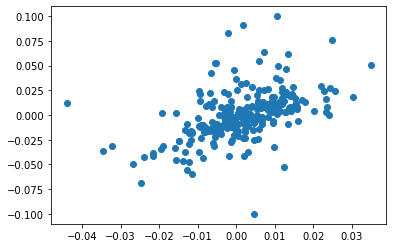

* 通过sm.OLS函数进行线性拟合，并画出拟合结果

np.arange

In [11]:
model = sm.OLS((Rq-Rf), sm.add_constant(Rm-Rf))
result = model.fit()

C:\Users\wp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                close_x   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     77.02
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           3.16e-16
Time:                        21:21:30   Log-Likelihood:                 580.35
No. Observations:                 243   AIC:                            -1157.
Df Residuals:                     241   BIC:                            -1150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.001     -1.102      0.272      -0.004       0.001
close_y        1.1238      0.128      8.776      0.000       0.872       1.376
==============================================================================
Omnibus:                       49.522   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.212
Skew:                           0.695   Prob(JB):                     3.77e-51
Kurtosis:                       7.583   Cond. No.                         89.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
result.params

const     -0.0016
close_y    1.1238
dtype: float64

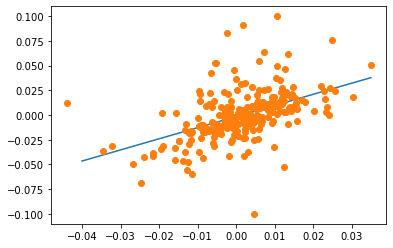

## classwork 2

书本 306页题目

In [ ]:
(0.1-0.04)*1=Rq-0.04

## classwork3

计算SHSE.000300中的股票在2014年的alpha与beta值，并选择其中alpha值为前10个股票，看是否接下来一年的平均收益高于SHSE.000300

get_history_constituents

In [42]:
stock_300=get_history_constituents(index='SHSE.000300', start_date='2014-01-01',end_date="2014-12-31")[0]['constituents'].keys()
stock_300

dict_keys(['SZSE.002236', 'SZSE.002241', 'SHSE.601618', 'SHSE.601633', 'SHSE.601628', 'SZSE.002304', 'SZSE.002310', 'SZSE.002269', 'SHSE.601666', 'SHSE.601717', 'SZSE.002344', 'SZSE.002294', 'SHSE.601668', 'SHSE.601669', 'SZSE.002353', 'SZSE.002299', 'SHSE.601688', 'SZSE.002415', 'SHSE.601800', 'SZSE.002422', 'SZSE.002375', 'SHSE.601699', 'SZSE.002431', 'SHSE.601808', 'SZSE.002385', 'SHSE.601766', 'SHSE.601818', 'SZSE.002500', 'SZSE.002450', 'SZSE.002399', 'SZSE.002456', 'SHSE.601901', 'SHSE.601857', 'SHSE.601866', 'SHSE.601918', 'SZSE.002603', 'SHSE.601928', 'SHSE.601933', 'SHSE.601888', 'SZSE.002570', 'SHSE.601939', 'SHSE.603000', 'SHSE.601898', 'SHSE.601899', 'SHSE.601958', 'SZSE.002594', 'SZSE.002653', 'SHSE.601991', 'SHSE.601992', 'SHSE.601988', 'SHSE.601989', 'SZSE.002673', 'SHSE.601998', 'SZSE.000001', 'SZSE.000002', 'SZSE.000012', 'SZSE.000009', 'SZSE.000024', 'SZSE.000039', 'SZSE.000100', 'SZSE.000046', 'SZSE.000060', 'SZSE.000061', 'SZSE.000063', 'SHSE.600000', 'SZSE.000069',

In [47]:
stock_s=",".join(stock_300)

In [49]:
data_300= history(symbol=stock_s, frequency='1d', start_time='2014-01-01',  end_time='2014-12-31', fields='close,eob,symbol', fill_missing="Last", adjust=ADJUST_PREV, df= True)

In [53]:
def CAPM_a(x):
    data0=pd.merge(right=data_902,left=x,on="eob")
    Rm=(data0.close_y/data0.close_y.shift(1)-1).dropna()
    Rq=(data0.close_x/data0.close_x.shift(1)-1).dropna()
    model = sm.OLS((Rq-Rf), sm.add_constant(Rm-Rf))
    result = model.fit()
    return result.params["const"]

In [54]:
data_300[data_300.symbol=='SHSE.601009']
CAPM_a(data_300[data_300.symbol=='SHSE.601009'])

C:\Users\wp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


-0.0013534362396692156

In [56]:
a1=[]
sb=[]
for i in stock_300:
    a1.append(CAPM_a(data_300[data_300.symbol==i]))
    sb.append(i)

In [60]:
a1_sb=pd.DataFrame({"a1":a1,"sb":sb})

In [64]:
a1_sb.sort_values(by="a1").tail(10).sb.values

array(['SHSE.600893', 'SHSE.600519', 'SHSE.601098', 'SHSE.601998',
       'SHSE.600582', 'SHSE.601099', 'SHSE.600688', 'SHSE.600109',
       'SHSE.600588', 'SZSE.000562'], dtype=object)

In [50]:
len(data_300)

33000

In [46]:
#list(stock_300).join

In [48]:
#stock_s

In [87]:
stock_s

'SZSE.000063,SHSE.600000,SZSE.000069,SHSE.600010,'

In [41]:
data_300

,close,eob,symbol
0,12.9425,2014-01-02 00:00:00+08:00,SHSE.601607
1,6.8117,2014-01-02 00:00:00+08:00,SHSE.600583
2,2.6563,2014-01-02 00:00:00+08:00,SHSE.600115
3,7.3521,2014-01-02 00:00:00+08:00,SHSE.600649
4,5.3493,2014-01-02 00:00:00+08:00,SHSE.601369
...,...,...,...
32995,14.9777,2014-12-31 00:00:00+08:00,SZSE.000783
32996,13.4837,2014-12-31 00:00:00+08:00,SZSE.000963
32997,5.6924,2014-12-31 00:00:00+08:00,SZSE.000338
32998,8.8080,2014-12-31 00:00:00+08:00,SZSE.000046


In [32]:
Rm

1     -0.0090
2     -0.0246
3      0.0038
4      0.0041
5     -0.0115
        ...  
239    0.0243
240    0.0204
241   -0.0059
242   -0.0081
243    0.0158
Name: close_y, Length: 243, dtype: float64

In [65]:
stock_300=get_history_constituents(index='SHSE.000300', start_date='2014-01-01',end_date="2014-12-31")[0]['constituents'].keys()
data_902= history(symbol='SHSE.000902', frequency='1d', start_time='2014-01-01',  end_time='2014-12-31', 
                  fields='close,eob', fill_missing="Last", adjust=ADJUST_PREV, df= True)
stock_s=",".join(stock_300)
data_300= history(symbol=stock_s, frequency='1d', start_time='2014-01-01',  end_time='2014-12-31', 
                  fields='close,eob,symbol', fill_missing="Last", adjust=ADJUST_PREV, df= True)


def CAPM_a(x):
    data0=pd.merge(right=data_902,left=x,on="eob")
    Rm=(data0.close_y/data0.close_y.shift(1)-1).dropna()
    Rq=(data0.close_x/data0.close_x.shift(1)-1).dropna()
    model = sm.OLS((Rq-Rf), sm.add_constant(Rm-Rf))
    result = model.fit()
    return result.params["const"]

a1=[]
sb=[]
for i in stock_300:
    a1.append(CAPM_a(data_300[data_300.symbol==i]))
    sb.append(i)
    
a1_sb=pd.DataFrame({"a1":a1,"sb":sb})
a1_sb.sort_values(by="a1").tail(10).sb.values

C:\Users\wp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array(['SHSE.600893', 'SHSE.600519', 'SHSE.601098', 'SHSE.601998',
       'SHSE.600582', 'SHSE.601099', 'SHSE.600688', 'SHSE.600109',
       'SHSE.600588', 'SZSE.000562'], dtype=object)